## Carregando os dados

In [1]:
import pandas as pd

In [2]:
passageiros = pd.read_csv('data/Passageiros.csv')

In [3]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [4]:
import seaborn as sns

In [5]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['font.size'] = 22

<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

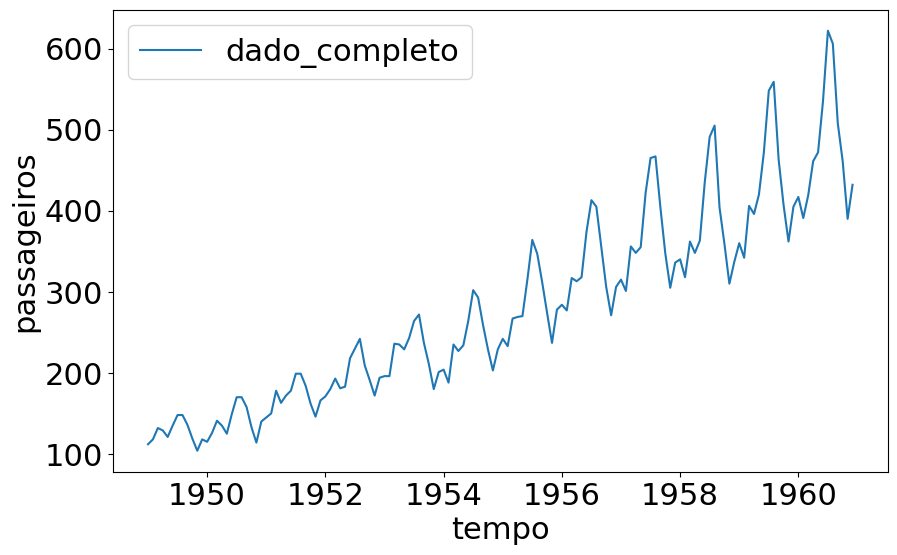

In [6]:
sns.lineplot(x = 'tempo', y = 'passageiros', data = passageiros, label = 'dado_completo') 

## Escalando os dados

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()

In [9]:
sc.fit(passageiros)

StandardScaler()

In [10]:
dado_escalado = sc.transform(passageiros)

In [11]:
x = dado_escalado[:, 0] #Features - Características - Tempo
y = dado_escalado[:, 1] #Alvo - Número de passageiros

In [12]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Data')

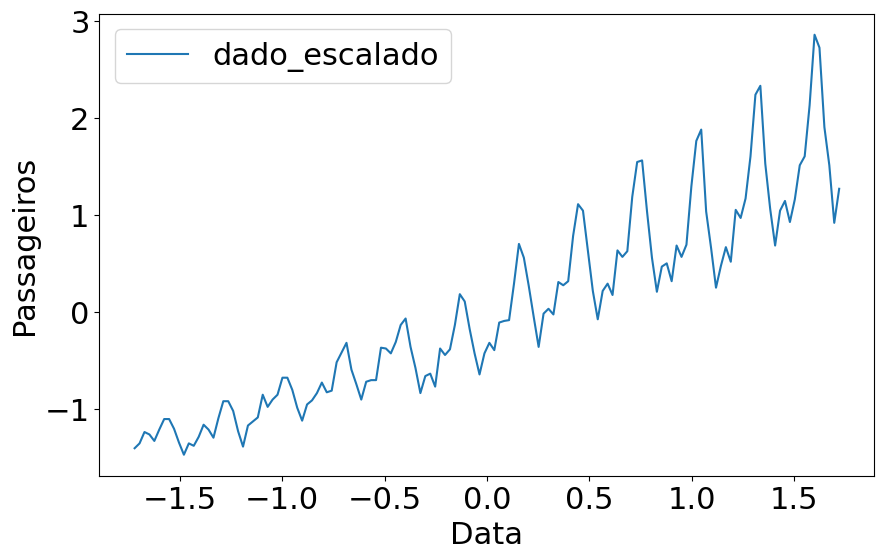

In [13]:
sns.lineplot(x = x, y = y, label = 'dado_escalado') 
plt.ylabel('Passageiros')
plt.xlabel('Data')

## Dividindo em treino e teste

In [14]:
tamanho_treino = int(len(passageiros) * 0.9) #Pegando 90% dos dados para treino
tamanho_teste = len(passageiros) - tamanho_treino #O resto vamos reservar para teste

In [15]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

In [16]:
xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

<AxesSubplot:>

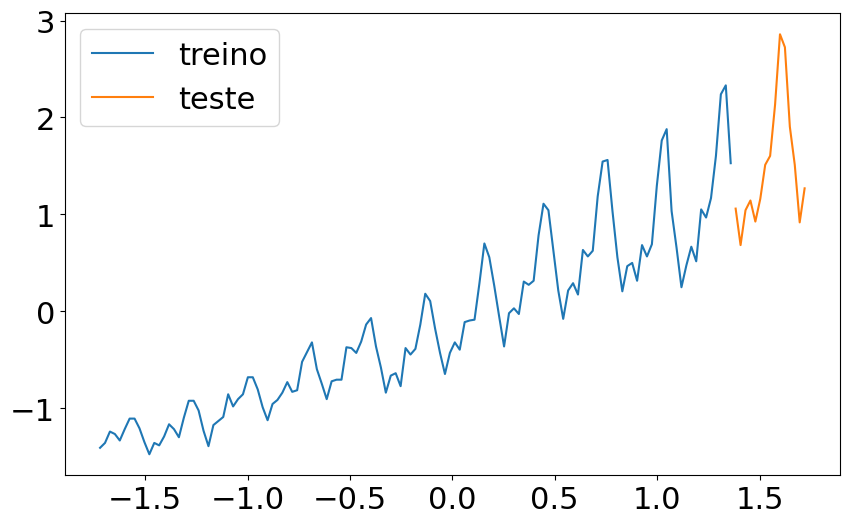

In [17]:
sns.lineplot(x = xtreino, y = ytreino,label = 'treino') 
sns.lineplot(x = xteste, y = yteste, label = 'teste') 

## Regressão Linear

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [19]:
regressor = Sequential()

In [20]:
regressor.add(Dense(1, input_dim = 1, kernel_initializer = 'Ones', 
                    activation = 'linear', use_bias = False))

In [21]:
regressor.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [22]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [23]:
regressor.fit(xtreino, ytreino)

5/5 [==============================] - 0s 5ms/step - loss: 0.1284


In [24]:
y_predict= regressor.predict(xtreino) #Prevendo os dados de treino (o ajuste)

5/5 [==============================] - 0s 1ms/step


<AxesSubplot:>

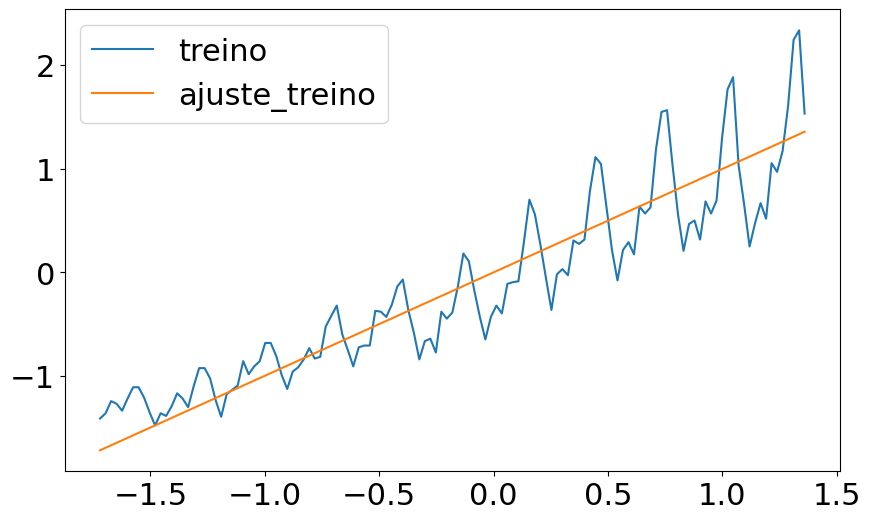

In [25]:
sns.lineplot(x = xtreino, y = ytreino,label = 'treino')
sns.lineplot(x = xtreino, y = y_predict[:,0], label = 'ajuste_treino')

In [26]:
d = {'tempo': xtreino, 'passageiros': y_predict[:,0]}
resultados = pd.DataFrame(data = d)

In [27]:
resultados

,tempo,passageiros
0,-1.720064,-1.713745
1,-1.696007,-1.689777
2,-1.671950,-1.665808
3,-1.647894,-1.641840
4,-1.623837,-1.617871
...,...,...
124,1.262984,1.258344
125,1.287041,1.282313
126,1.311098,1.306281
127,1.335155,1.330250


In [28]:
resultado_transf = sc.inverse_transform(resultados)

In [29]:
resultado_transf = pd.DataFrame(resultado_transf)
resultado_transf.columns = ['tempo','passageiros']

<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

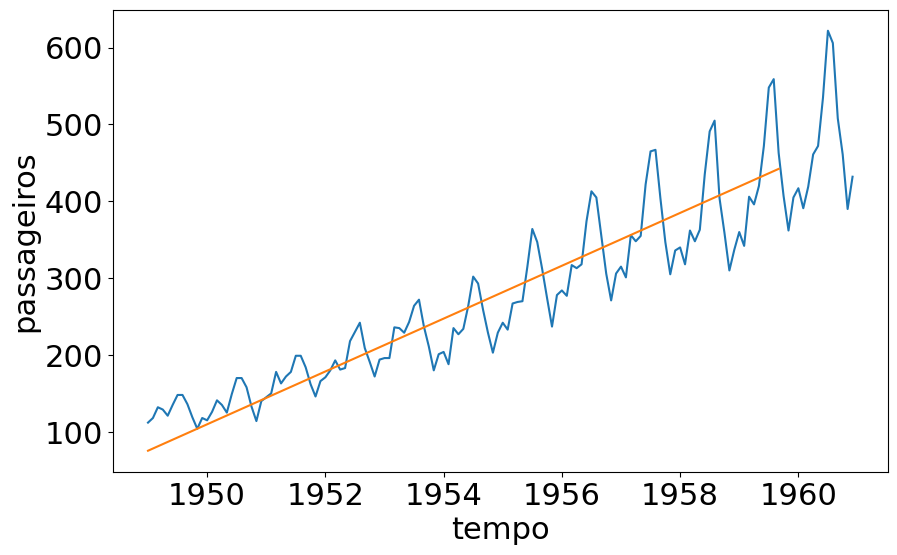

In [30]:
sns.lineplot(x = "tempo", y = "passageiros", data = passageiros)
sns.lineplot(x = "tempo", y = "passageiros", data = resultado_transf)

In [31]:
y_predict_teste = regressor.predict(xteste) #Prevendo os dados de teste(o futuro)

1/1 [==============================] - 0s 21ms/step


In [32]:
d = {'tempo': xteste, 'passageiros': y_predict_teste[:, 0]}
resultados_teste = pd.DataFrame(data = d)

In [33]:
resultado_transf_teste = sc.inverse_transform(resultados_teste)

In [34]:
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)
resultado_transf_teste.columns = ['tempo', 'passageiros']

<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

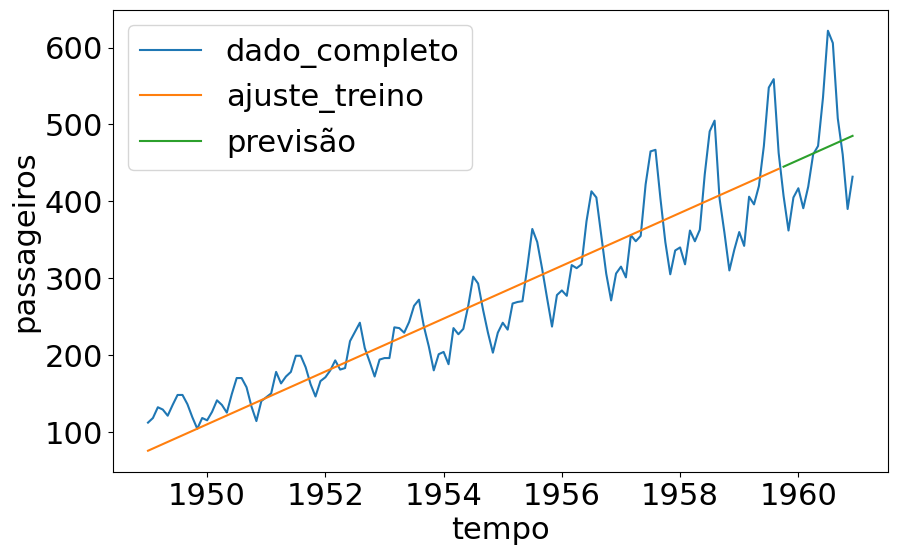

In [35]:
sns.lineplot(x = "tempo", y = "passageiros", data = passageiros, label = 'dado_completo')
sns.lineplot(x = "tempo", y = "passageiros", data = resultado_transf, label = 'ajuste_treino')
sns.lineplot(x = "tempo", y = "passageiros", data = resultado_transf_teste, label = 'previsão')

## Regressão não-linear

In [36]:
regressor2 = Sequential()

In [37]:
regressor2.add(Dense(8, input_dim = 1, kernel_initializer = 'random_uniform', 
                     activation = 'sigmoid',use_bias=False)) 
regressor2.add(Dense(8, kernel_initializer = 'random_uniform', 
                     activation = 'sigmoid',use_bias = False))
regressor2.add(Dense(1, kernel_initializer = 'random_uniform', 
                     activation = 'linear', use_bias = False))

In [38]:
regressor2.compile(loss = 'mean_squared_error', optimizer = 'adam')
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [39]:
regressor2.fit(xtreino, ytreino, epochs = 500)

Epoch 1/500
5/5 [==============================] - 0s 5ms/step - loss: 0.8090
Epoch 2/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8036
Epoch 3/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7998
Epoch 4/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7962
Epoch 5/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7943
Epoch 6/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7936
Epoch 7/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7933
Epoch 8/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7928
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7919
Epoch 10/500
5/5 [==============================] - 0s 124us/step - loss: 0.7913
Epoch 11/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7903
Epoch 12/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7898
Epoch 13/500
5/5 [==============================] - 0s 1ms/

5/5 [==============================] - 0s 0s/step - loss: 0.7591
Epoch 106/500
5/5 [==============================] - 0s 4ms/step - loss: 0.7590
Epoch 107/500
5/5 [==============================] - 0s 0s/step - loss: 0.7585
Epoch 108/500
5/5 [==============================] - 0s 0s/step - loss: 0.7587
Epoch 109/500
5/5 [==============================] - 0s 4ms/step - loss: 0.7579
Epoch 110/500
5/5 [==============================] - 0s 0s/step - loss: 0.7573
Epoch 111/500
5/5 [==============================] - 0s 0s/step - loss: 0.7567
Epoch 112/500
5/5 [==============================] - 0s 4ms/step - loss: 0.7567
Epoch 113/500
5/5 [==============================] - 0s 4ms/step - loss: 0.7555
Epoch 114/500
5/5 [==============================] - 0s 0s/step - loss: 0.7553
Epoch 115/500
5/5 [==============================] - 0s 0s/step - loss: 0.7547
Epoch 116/500
5/5 [==============================] - 0s 4ms/step - loss: 0.7546
Epoch 117/500
5/5 [==============================] - 0s 4ms/s

5/5 [==============================] - 0s 0s/step - loss: 0.6299
Epoch 311/500
5/5 [==============================] - 0s 0s/step - loss: 0.6289
Epoch 312/500
5/5 [==============================] - 0s 4ms/step - loss: 0.6282
Epoch 313/500
5/5 [==============================] - 0s 0s/step - loss: 0.6280
Epoch 314/500
5/5 [==============================] - 0s 4ms/step - loss: 0.6273
Epoch 315/500
5/5 [==============================] - 0s 0s/step - loss: 0.6265
Epoch 316/500
5/5 [==============================] - 0s 4ms/step - loss: 0.6244
Epoch 317/500
5/5 [==============================] - 0s 0s/step - loss: 0.6233
Epoch 318/500
5/5 [==============================] - 0s 0s/step - loss: 0.6224
Epoch 319/500
5/5 [==============================] - 0s 4ms/step - loss: 0.6215
Epoch 320/500
5/5 [==============================] - 0s 0s/step - loss: 0.6208
Epoch 321/500
5/5 [==============================] - 0s 127us/step - loss: 0.6199
Epoch 322/500
5/5 [==============================] - 0s 4ms

In [40]:
y_predict = regressor2.predict(xtreino) #Prevendo os dados de treino (o ajuste)

5/5 [==============================] - 0s 1ms/step


In [41]:
y_predict_teste = regressor2.predict(xteste) #Prevendo os dados de teste(o futuro)

1/1 [==============================] - 0s 21ms/step


<AxesSubplot:>

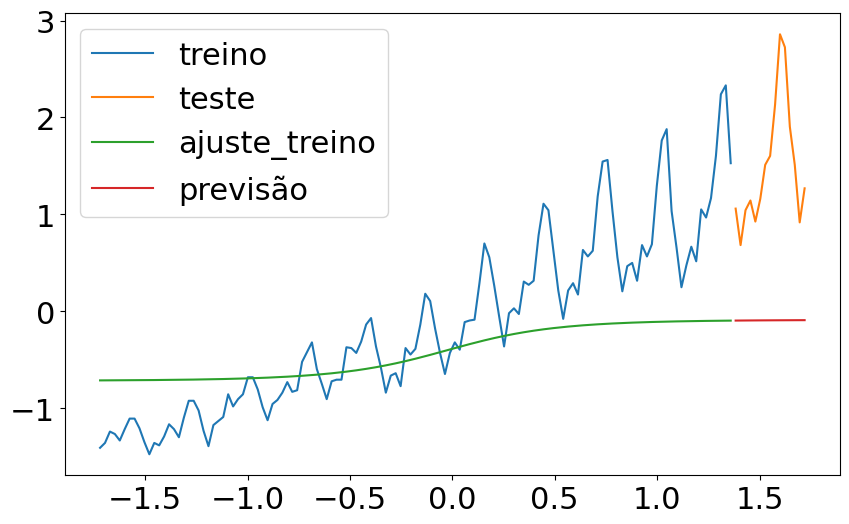

In [42]:
sns.lineplot(x = xtreino, y = ytreino, label = 'treino')
sns.lineplot(x = xteste, y = yteste, label = 'teste')
sns.lineplot(x = xtreino, y = y_predict[:, 0], label = 'ajuste_treino')
sns.lineplot(x = xteste, y = y_predict_teste[:, 0], label = 'previsão')

## Alterando a forma como passamos os dados

Agora x e y vão valores diferentes. X vai conter o número de passageiros em um tempo anterior e y vai conter o número de passageiros em t+1, por exemplo. 

In [43]:
vetor = pd.DataFrame(ytreino)[0]

In [44]:
import numpy as np

In [45]:
def separa_dados(vetor,n_passos):
    """Entrada: vetor: número de passageiros
               n_passos: número de passos no regressor
     Saída:
              X_novo: Array 2D 
              y_novo: Array 1D - Nosso alvo
    """
    X_novo, y_novo = [], []
    for i in range(n_passos, vetor.shape[0]):
        X_novo.append(list(vetor.loc[i - n_passos:i - 1]))
        y_novo.append(vetor.loc[i])
    X_novo, y_novo = np.array(X_novo), np.array(y_novo) 
    return X_novo, y_novo

In [46]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 1)

In [47]:
xtreino_novo[0:5] #X

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [48]:
ytreino_novo[0:5] #y

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

## Agora vamos separar o teste

In [49]:
vetor2 = pd.DataFrame(yteste)[0]

In [50]:
xteste_novo, yteste_novo = separa_dados(vetor2, 1)

## Voltando para as redes neurais

In [51]:
regressor3 = Sequential()

In [52]:
regressor3.add(Dense(8, input_dim = 1, kernel_initializer='ones', activation = 'linear', use_bias = False))
regressor3.add(Dense(64, kernel_initializer = 'random_uniform', activation = 'sigmoid', use_bias = False))
regressor3.add(Dense(1, kernel_initializer = 'random_uniform', activation = 'linear', use_bias = False))
regressor3.compile(loss = 'mean_squared_error',optimizer = 'adam')
regressor3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 8         
                                                                 
 dense_5 (Dense)             (None, 64)                512       
                                                                 
 dense_6 (Dense)             (None, 1)                 64        
                                                                 
Total params: 584
Trainable params: 584
Non-trainable params: 0
_________________________________________________________________


In [53]:
regressor3.fit(xtreino_novo, ytreino_novo,epochs = 100)

Epoch 1/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7834
Epoch 2/100
4/4 [==============================] - 0s 0s/step - loss: 0.7431
Epoch 3/100
4/4 [==============================] - 0s 0s/step - loss: 0.7265
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7054
Epoch 5/100
4/4 [==============================] - 0s 0s/step - loss: 0.6850
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6646
Epoch 7/100
4/4 [==============================] - 0s 0s/step - loss: 0.6415
Epoch 8/100
4/4 [==============================] - 0s 0s/step - loss: 0.6143
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 0.5882
Epoch 10/100
4/4 [==============================] - 0s 0s/step - loss: 0.5571
Epoch 11/100
4/4 [==============================] - 0s 0s/step - loss: 0.5256
Epoch 12/100
4/4 [==============================] - 0s 6ms/step - loss: 0.4924
Epoch 13/100
4/4 [==============================] - 0s 0s/step - los

In [54]:
y_predict_novo = regressor3.predict(xtreino_novo)

4/4 [==============================] - 0s 2ms/step


<AxesSubplot:xlabel='tempo', ylabel='0'>

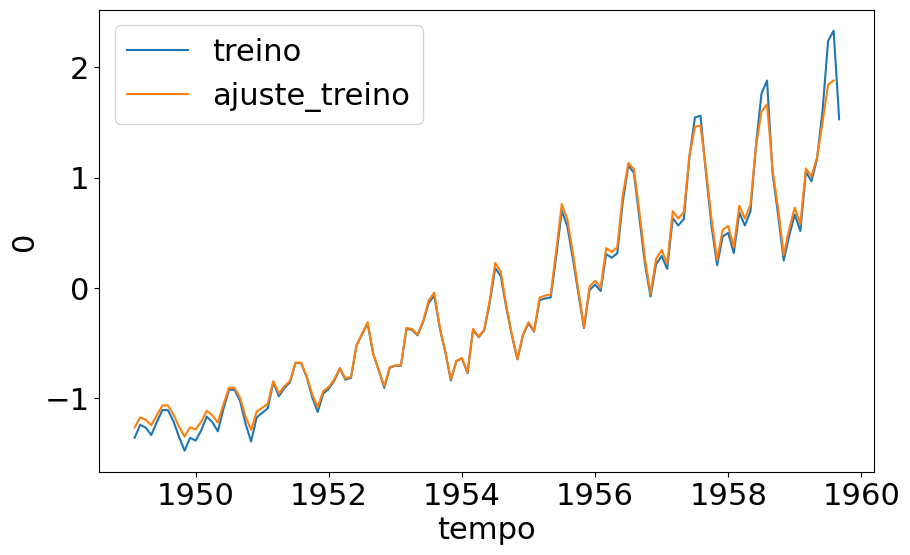

In [55]:
sns.lineplot(x = 'tempo', y = ytreino_novo, data = passageiros[1:129], label = 'treino')
sns.lineplot(x = 'tempo', y = pd.DataFrame(y_predict_novo)[0], data = passageiros[1:129],label = 'ajuste_treino')

In [56]:
y_predict_teste_novo = regressor3.predict(xteste_novo)

1/1 [==============================] - 0s 42ms/step


In [57]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<AxesSubplot:xlabel='tempo', ylabel='0'>

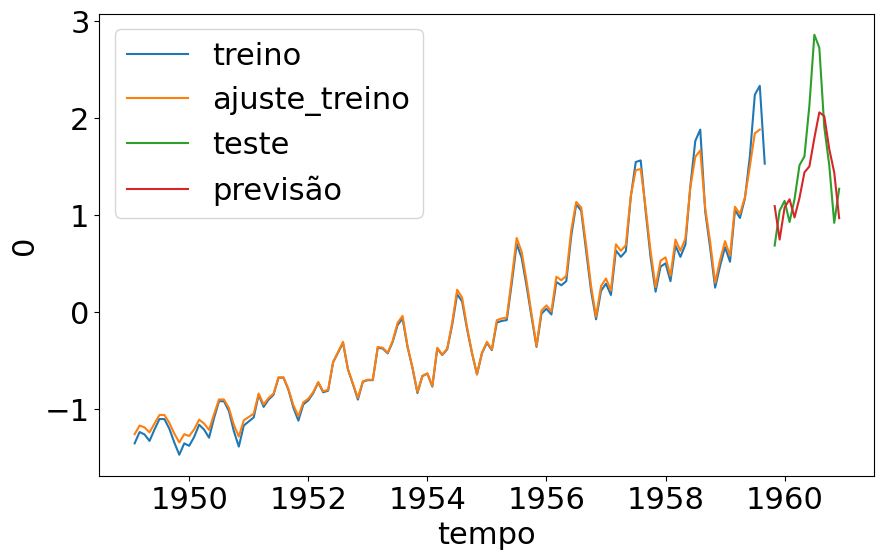

In [58]:
sns.lineplot(x = 'tempo', y = ytreino_novo,data=passageiros[1:129],label='treino')
sns.lineplot(x = 'tempo', y = pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129],label='ajuste_treino')

sns.lineplot(x = 'tempo', y = yteste_novo,data = passageiros[130:144],label = 'teste')
sns.lineplot(x = 'tempo', y = resultado.values, data = passageiros[130:144], label = 'previsão')

## Janelas

In [59]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 4)

In [60]:
xtreino_novo[0:5] #X

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [61]:
ytreino_novo[0:5] #y

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [62]:
xteste_novo, yteste_novo = separa_dados(vetor2,4)

In [63]:
regressor4 = Sequential()

In [64]:
regressor4.add(Dense(8, input_dim = 4, kernel_initializer = 'random_uniform', activation = 'linear', use_bias = False)) #relu
regressor4.add(Dense(64, kernel_initializer = 'random_uniform', activation = 'sigmoid', use_bias = False)) #relu
regressor4.add(Dense(1, kernel_initializer = 'random_uniform', activation = 'linear', use_bias = False))
regressor4.compile(loss = 'mean_squared_error', optimizer = 'adam')
regressor4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8)                 32        
                                                                 
 dense_8 (Dense)             (None, 64)                512       
                                                                 
 dense_9 (Dense)             (None, 1)                 64        
                                                                 
Total params: 608
Trainable params: 608
Non-trainable params: 0
_________________________________________________________________


In [65]:
regressor4.fit(xtreino_novo, ytreino_novo, epochs = 300)

Epoch 1/300
4/4 [==============================] - 0s 5ms/step - loss: 0.7981
Epoch 2/300
4/4 [==============================] - 0s 664us/step - loss: 0.7673
Epoch 3/300
4/4 [==============================] - 0s 5ms/step - loss: 0.7565
Epoch 4/300
4/4 [==============================] - 0s 0s/step - loss: 0.7612
Epoch 5/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7560
Epoch 6/300
4/4 [==============================] - 0s 0s/step - loss: 0.7535
Epoch 7/300
4/4 [==============================] - 0s 0s/step - loss: 0.7483
Epoch 8/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7428
Epoch 9/300
4/4 [==============================] - 0s 5ms/step - loss: 0.7363
Epoch 10/300
4/4 [==============================] - 0s 0s/step - loss: 0.7277
Epoch 11/300
4/4 [==============================] - 0s 5ms/step - loss: 0.7191
Epoch 12/300
4/4 [==============================] - 0s 0s/step - loss: 0.7093
Epoch 13/300
4/4 [==============================] - 0s 0s/step -

4/4 [==============================] - 0s 0s/step - loss: 0.0646
Epoch 209/300
4/4 [==============================] - 0s 0s/step - loss: 0.0646
Epoch 210/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0646
Epoch 211/300
4/4 [==============================] - 0s 0s/step - loss: 0.0644
Epoch 212/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0643
Epoch 213/300
4/4 [==============================] - 0s 0s/step - loss: 0.0645
Epoch 214/300
4/4 [==============================] - 0s 0s/step - loss: 0.0642
Epoch 215/300
4/4 [==============================] - 0s 5ms/step - loss: 0.0639
Epoch 216/300
4/4 [==============================] - 0s 0s/step - loss: 0.0639
Epoch 217/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0647
Epoch 218/300
4/4 [==============================] - 0s 0s/step - loss: 0.0638
Epoch 219/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0635
Epoch 220/300
4/4 [==============================] - 0s 0s/st

In [66]:
y_predict_teste_novo = regressor4.predict(xteste_novo)

1/1 [==============================] - 0s 46ms/step


In [67]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<AxesSubplot:xlabel='tempo', ylabel='0'>

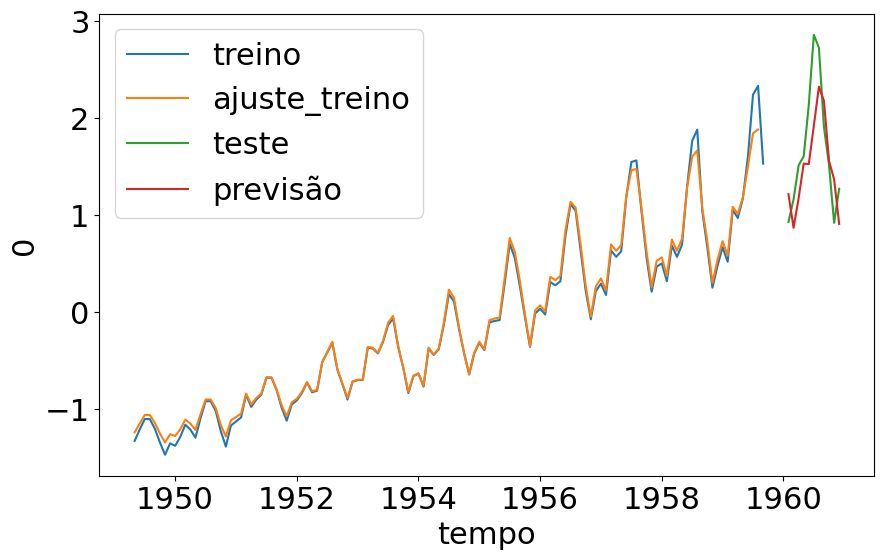

In [68]:
sns.lineplot(x = 'tempo', y = ytreino_novo, data = passageiros[4:129], label = 'treino')
sns.lineplot(x = 'tempo', y = pd.DataFrame(y_predict_novo)[0], data = passageiros[4:129], label = 'ajuste_treino')

sns.lineplot(x = 'tempo', y = yteste_novo, data = passageiros[133:144], label = 'teste')
sns.lineplot(x = 'tempo', y = resultado.values, data = passageiros[133:144], label = 'previsão')

## LSTMs

In [69]:
#Nova base de dados

In [70]:
bike = pd.read_csv('data/bicicletas.csv')

In [71]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [72]:
bike['datas'] = pd.to_datetime(bike['datas'])

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

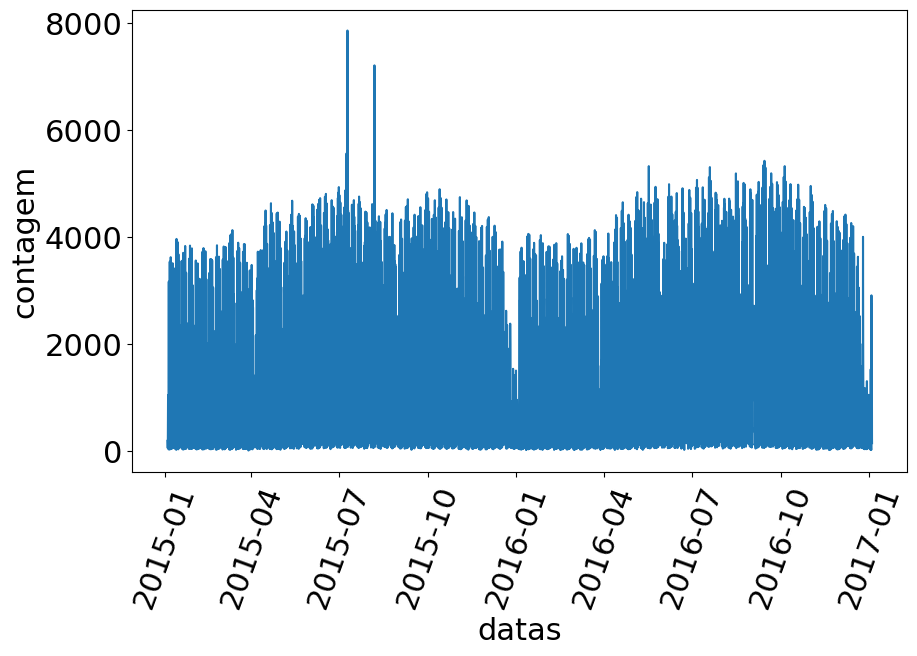

In [73]:
sns.lineplot(x = 'datas',y = 'contagem', data = bike)
plt.xticks(rotation = 70)

## Escalando os dados

In [74]:
sc2 = StandardScaler()

In [75]:
sc2.fit(bike['contagem'].values.reshape(-1, 1))

StandardScaler()

In [76]:
y = sc2.transform(bike['contagem'].values.reshape(-1, 1))

## Dividindo em treino e teste

In [77]:
tamanho_treino = int(len(bike) * 0.9) #Pegando 90% dos dados para treino
tamanho_teste = len(bike) - tamanho_treino #O resto vamos reservar para teste

In [78]:
ytreino = y[0:tamanho_treino]
yteste = y[tamanho_treino:len(bike)]

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

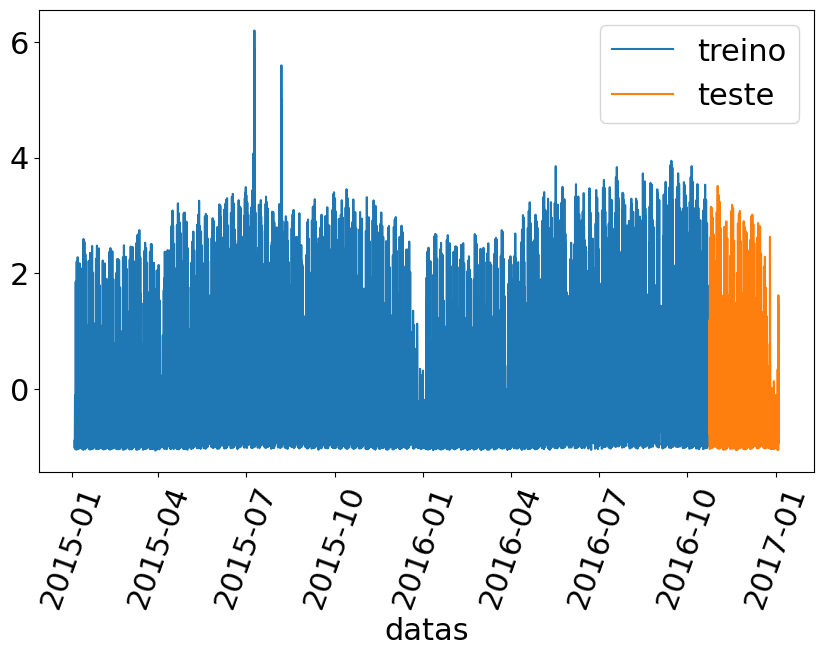

In [79]:
sns.lineplot(x = 'datas', y = ytreino[:,0], data = bike[0:tamanho_treino], label = 'treino') 
sns.lineplot(x = 'datas', y = yteste[:,0], data = bike[tamanho_treino:len(bike)], label = 'teste')
plt.xticks(rotation=70) 

In [80]:
vetor = pd.DataFrame(ytreino)[0]

In [81]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 10)

In [82]:
xtreino_novo[0:5]

array([[-0.88574518, -0.9262953 , -0.92998167, -0.98712048, -1.01016032,
        -1.01108192, -1.00647395, -0.9843557 , -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, -1.01016032, -1.01108192,
        -1.00647395, -0.9843557 , -0.93274645, -0.77607553, -0.56687377],
       [-0.92998167, -0.98712048, -1.01016032, -1.01108192, -1.00647395,
        -0.9843557 , -0.93274645, -0.77607553, -0.56687377, -0.38347663],
       [-0.98712048, -1.01016032, -1.01108192, -1.00647395, -0.9843557 ,
        -0.93274645, -0.77607553, -0.56687377, -0.38347663, -0.25906149],
       [-1.01016032, -1.01108192, -1.00647395, -0.9843557 , -0.93274645,
        -0.77607553, -0.56687377, -0.38347663, -0.25906149, -0.20929543]])

In [83]:
ytreino_novo[0:5]

array([-0.56687377, -0.38347663, -0.25906149, -0.20929543, -0.09593941])

In [84]:
vetor2 = pd.DataFrame(yteste)[0]

In [85]:
xteste_novo, yteste_novo = separa_dados(vetor2, 10)

## O que a LSTM espera

A entrada de redes recorrentes deve possuir a seguinte forma para a entrada (número de amostras, número de passos no tempo, e número de atributos por passo no tempo).

In [86]:
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0], xtreino_novo.shape[1],1))

In [87]:
xtreino_novo.shape

(15662, 10, 1)

In [88]:
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0], xteste_novo.shape[1],1))

## Usando a LSTM

In [89]:
from tensorflow.keras.layers import LSTM

In [90]:
recorrente = Sequential()

In [91]:
recorrente.add(LSTM(128, input_shape=(xtreino_novo.shape[1], xtreino_novo.shape[2])))
recorrente.add(Dense(units = 1))

In [92]:
recorrente.compile(loss = 'mean_squared_error',optimizer = 'RMSProp')
recorrente.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [94]:
resultado = recorrente.fit(xtreino_novo, ytreino_novo,validation_data = (xteste_novo, yteste_novo), epochs = 10)

Epoch 1/10
490/490 [==============================] - 4s 8ms/step - loss: 0.0262 - val_loss: 0.0158
Epoch 2/10
490/490 [==============================] - 4s 8ms/step - loss: 0.0256 - val_loss: 0.0189
Epoch 3/10
490/490 [==============================] - 4s 8ms/step - loss: 0.0254 - val_loss: 0.0211
Epoch 4/10
490/490 [==============================] - 4s 8ms/step - loss: 0.0253 - val_loss: 0.0152
Epoch 5/10
490/490 [==============================] - 4s 9ms/step - loss: 0.0250 - val_loss: 0.0171
Epoch 6/10
490/490 [==============================] - 4s 8ms/step - loss: 0.0249 - val_loss: 0.0173
Epoch 7/10
490/490 [==============================] - 4s 8ms/step - loss: 0.0247 - val_loss: 0.0164
Epoch 8/10
490/490 [==============================] - 4s 8ms/step - loss: 0.0243 - val_loss: 0.0156
Epoch 9/10
490/490 [==============================] - 3s 7ms/step - loss: 0.0245 - val_loss: 0.0150
Epoch 10/10
490/490 [==============================] - 3s 7ms/step - loss: 0.0242 - val_loss: 0.0176

In [95]:
y_ajustado = recorrente.predict(xtreino_novo)

490/490 [==============================] - 2s 3ms/step


(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

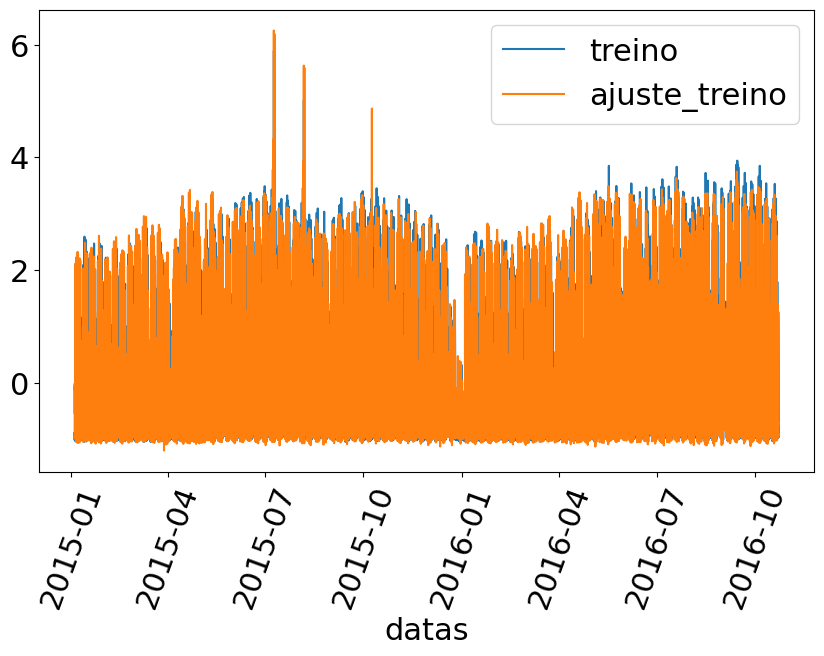

In [96]:
sns.lineplot(x = 'datas',y = ytreino[:,0], data = bike[0:tamanho_treino], label = 'treino')
sns.lineplot(x = 'datas',y = y_ajustado[:,0], data = bike[0:15662], label = 'ajuste_treino')
plt.xticks(rotation = 70) 

In [97]:
y_predito = recorrente.predict(xteste_novo)

55/55 [==============================] - 0s 4ms/step


(array([17106., 17120., 17136., 17150., 17167.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

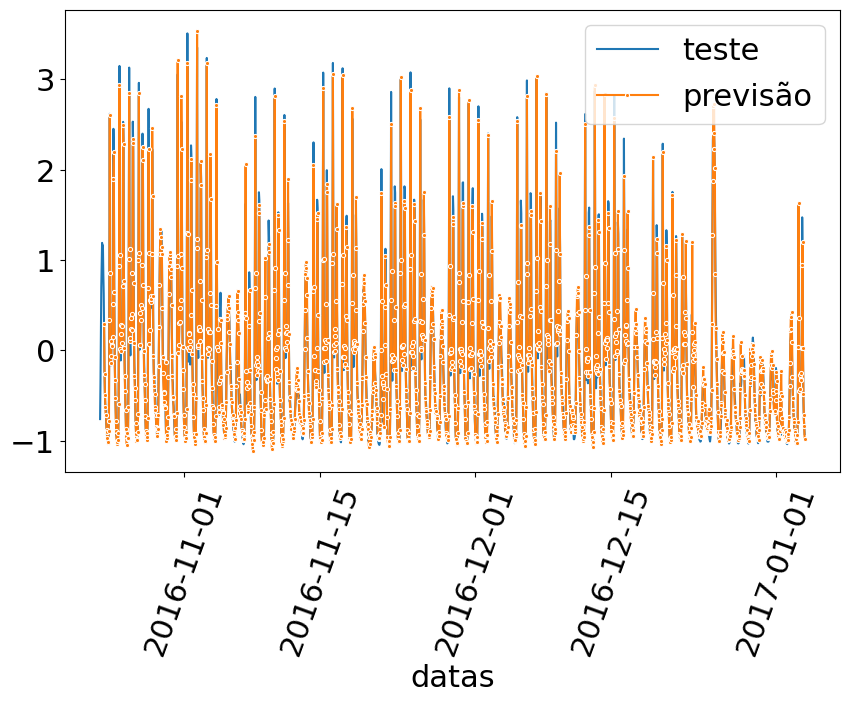

In [98]:
sns.lineplot(x = 'datas',y = yteste[:,0], data = bike[tamanho_treino:len(bike)], label = 'teste')
sns.lineplot(x = 'datas',y = y_predito[:,0], data = bike[tamanho_treino + 10:len(bike)], marker = '.', label = 'previsão')
plt.xticks(rotation = 70) 

# Aula 5

In [99]:
from tensorflow.keras.layers import GRU

In [100]:
recorrente_g = Sequential()

In [101]:
recorrente_g.add(GRU(128, input_shape = (xtreino_novo.shape[1], xtreino_novo.shape[2])
                    ))
recorrente_g.add(Dense(units = 1))

In [102]:
recorrente_g.compile(loss = 'mean_squared_error', optimizer = 'RMSProp')
recorrente_g.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [103]:
resultado2 = recorrente_g.fit(xtreino_novo,ytreino_novo,
                              validation_data = (xteste_novo, yteste_novo), epochs = 100)

Epoch 1/100
490/490 [==============================] - 6s 7ms/step - loss: 0.2371 - val_loss: 0.0720
Epoch 2/100
490/490 [==============================] - 3s 7ms/step - loss: 0.0732 - val_loss: 0.0409
Epoch 3/100
490/490 [==============================] - 3s 7ms/step - loss: 0.0511 - val_loss: 0.0376
Epoch 4/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0446 - val_loss: 0.0347
Epoch 5/100
490/490 [==============================] - 4s 7ms/step - loss: 0.0407 - val_loss: 0.0320
Epoch 6/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0386 - val_loss: 0.0224
Epoch 7/100
490/490 [==============================] - 4s 7ms/step - loss: 0.0365 - val_loss: 0.0245
Epoch 8/100
490/490 [==============================] - 4s 7ms/step - loss: 0.0345 - val_loss: 0.0206
Epoch 9/100
490/490 [==============================] - 3s 7ms/step - loss: 0.0339 - val_loss: 0.0388
Epoch 10/100
490/490 [==============================] - 3s 6ms/step - loss: 0.0331 - val_lo

In [104]:
y_predito2 = recorrente_g.predict(xteste_novo)

55/55 [==============================] - 1s 3ms/step


(array([17106., 17120., 17136., 17150., 17167.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

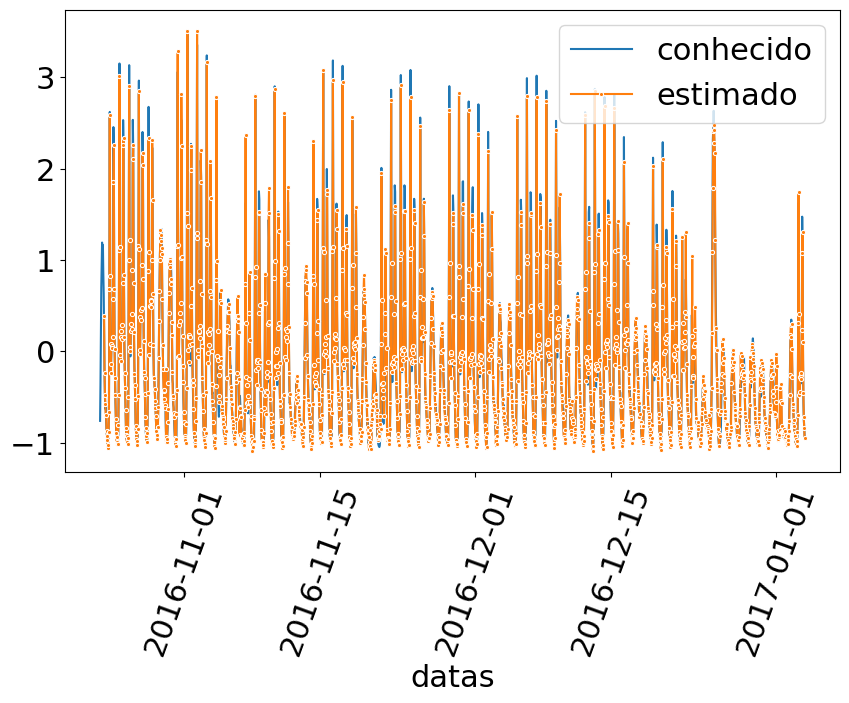

In [105]:
sns.lineplot(x = 'datas',y = yteste[:,0], data = bike[tamanho_treino:len(bike)])
sns.lineplot(x = 'datas',y = y_predito2[:,0], data = bike[tamanho_treino + 10:len(bike)], marker='.')
plt.legend(['conhecido','estimado'])
plt.xticks(rotation = 70) 

In [106]:
print(resultado2.history.keys())

dict_keys(['loss', 'val_loss'])


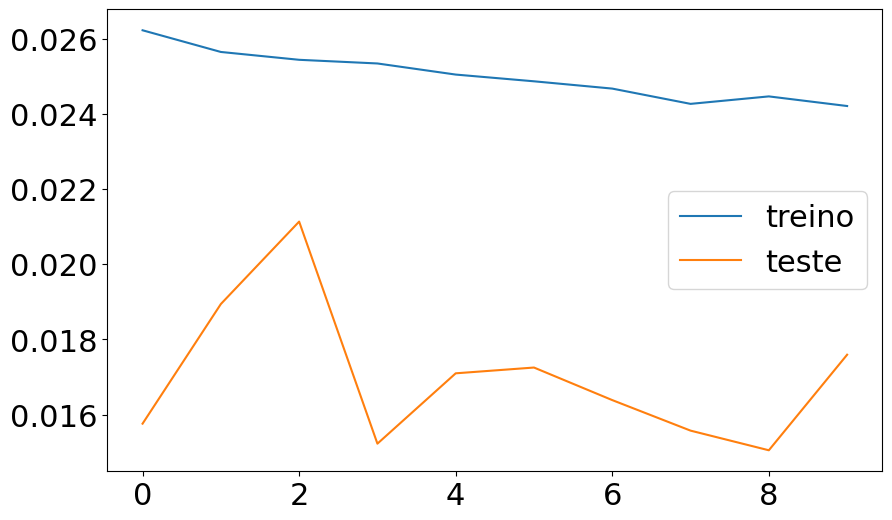

In [107]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.legend(['treino','teste'])

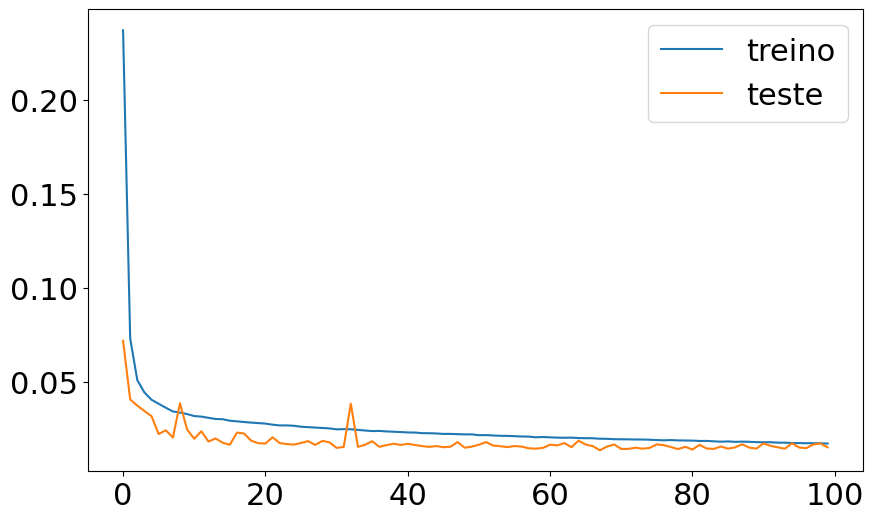

In [108]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])
plt.legend(['treino','teste'])


_